In [ ]:
import pandas as pd
import numpy as np

print("🔹 Step 1: Loading the input CSV...")
csv_path = "/kaggle/input/severityy/ensemble_individual_prediction_severity.csv"
df = pd.read_csv(csv_path)
print(f"✅ Loaded {len(df)} samples from: {csv_path}")

model_cols = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction"
]
print("\n🔹 Step 2: Model columns for voting:")
for col in model_cols:
    print(f" - {col}")

weights = {
    "bert-base-arabert-Severity_Prediction": 0.25,
    "BioBERT-Severity_Prediction": 0.1,
    "DistilBERT-Severity_Prediction": 0.20,
    "bert-base-multilingual-cased-Severity_Prediction": 0.3,
    "XLM-RoBERTa-Severity_Prediction": 0.15
}
print("\n🔹 Step 3: Using model weights:")
for k, v in weights.items():
    print(f" - {k}: {v}")

def weighted_vote(row):
    score_map = {}
    for col in model_cols:
        pred = row[col]
        weight = weights[col]
        score_map[pred] = score_map.get(pred, 0) + weight
    best = max(score_map, key=score_map.get)
    return best

print("\n🔹 Step 4: Applying weighted voting to each row...")
df["Weighted_Ensemble_Prediction"] = df.apply(weighted_vote, axis=1)

print("✅ Voting complete.")


df["Correct"] = df["Weighted_Ensemble_Prediction"] == df["True_Severity"]
accuracy = df["Correct"].mean()

output_path = "weighted_vote_results.csv"
df.to_csv(output_path, index=False)

print(f"\n📊 Step 5: Accuracy = {accuracy:.4f}")
print(f"📁 Results saved to: {output_path}")

print("\n🔹 Sample predictions:")
print(df[[
    "True_Severity",
    "Weighted_Ensemble_Prediction",
    "Correct"
] + model_cols].head())


🔹 Step 1: Loading the input CSV...
✅ Loaded 39789 samples from: /kaggle/input/severityy/ensemble_individual_prediction_severity.csv

🔹 Step 2: Model columns for voting:
 - bert-base-arabert-Severity_Prediction
 - BioBERT-Severity_Prediction
 - DistilBERT-Severity_Prediction
 - bert-base-multilingual-cased-Severity_Prediction
 - XLM-RoBERTa-Severity_Prediction

🔹 Step 3: Using model weights:
 - bert-base-arabert-Severity_Prediction: 0.3
 - BioBERT-Severity_Prediction: 0.25
 - DistilBERT-Severity_Prediction: 0.15
 - bert-base-multilingual-cased-Severity_Prediction: 0.2
 - XLM-RoBERTa-Severity_Prediction: 0.1

🔹 Step 4: Applying weighted voting to each row...
✅ Voting complete.

📊 Step 5: Accuracy = 0.9611
📁 Results saved to: weighted_vote_results.csv

🔹 Sample predictions:
  True_Severity Weighted_Ensemble_Prediction  Correct  \
0       غير حرج                      غير حرج     True   
1       غير حرج                      غير حرج     True   
2       غير حرج                      غير حرج   

In [ ]:
import pandas as pd
import numpy as np
import joblib

print("🔹 Step 1: Load CSV with individual model predictions...")
csv_path = "/kaggle/input/severityy/ensemble_individual_prediction_severity.csv"
df = pd.read_csv(csv_path)
print(f"✅ Loaded {len(df)} rows.")

model_cols = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction"
]
print("\n🔹 Using the following model prediction columns:")
for col in model_cols:
    print(f" - {col}")

all_labels = sorted(df["True_Severity"].unique())
label_to_id = {label: i for i, label in enumerate(all_labels)}
id_to_label = {i: label for label, i in label_to_id.items()}
print("\n🔹 Severity label mapping:")
print(label_to_id)

for col in model_cols:
    df[col + "_id"] = df[col].map(label_to_id)
df["True_Severity_id"] = df["True_Severity"].map(label_to_id)

X = df[[col + "_id" for col in model_cols]].values
y = df["True_Severity_id"].values

print("\n🔹 Loading trained meta-classifier...")
meta_model = joblib.load("/kaggle/working/meta_classifier.pkl")
print("✅ Meta-classifier loaded.")

print("🔹 Predicting using meta-classifier (stacking)...")
df["Stacking_Ensemble_Prediction_id"] = meta_model.predict(X)
df["Stacking_Ensemble_Prediction"] = df["Stacking_Ensemble_Prediction_id"].map(id_to_label)

df["Correct"] = df["Stacking_Ensemble_Prediction"] == df["True_Severity"]
accuracy = df["Correct"].mean()
df.to_csv("stacking_vote_results.csv", index=False)

print(f"\n📊 Stacking Ensemble Accuracy: {accuracy:.4f}")
print("📁 Results saved to 'stacking_vote_results.csv'")

print("\n🔹 Sample Results:")
print(df[[
    "True_Severity", 
    "Stacking_Ensemble_Prediction", 
    "Correct"
] + model_cols].head())


🔹 Step 1: Load CSV with individual model predictions...
✅ Loaded 39789 rows.

🔹 Using the following model prediction columns:
 - bert-base-arabert-Severity_Prediction
 - BioBERT-Severity_Prediction
 - DistilBERT-Severity_Prediction
 - bert-base-multilingual-cased-Severity_Prediction
 - XLM-RoBERTa-Severity_Prediction

🔹 Severity label mapping:
{'حرج': 0, 'غير حرج': 1}

🔹 Loading trained meta-classifier...


FileNotFoundError: [Errno 2] No such file or directory: 'meta_classifier.pkl'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import joblib

# Load the same file used earlier
df = pd.read_csv("/kaggle/input/severityy/ensemble_individual_prediction_severity.csv")

model_cols = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction"
]

all_labels = sorted(df["True_Severity"].unique())
label_to_id = {label: i for i, label in enumerate(all_labels)}
id_to_label = {i: label for label, i in label_to_id.items()}

for col in model_cols:
    df[col + "_id"] = df[col].map(label_to_id)
df["True_Severity_id"] = df["True_Severity"].map(label_to_id)

X = df[[col + "_id" for col in model_cols]].values
y = df["True_Severity_id"].values

meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(X, y)

# Save model
joblib.dump(meta_model, "meta_classifier.pkl")
print("✅ Meta-classifier trained and saved as 'meta_classifier.pkl'")


✅ Meta-classifier trained and saved as 'meta_classifier.pkl'


In [ ]:
import pandas as pd
import numpy as np
import joblib

# 🔹 Paths
csv_path = "/kaggle/working/weighted_vote_results.csv"
meta_model_path = "/kaggle/working/meta_classifier.pkl"

df = pd.read_csv(csv_path)

meta_model = joblib.load(meta_model_path)

model_cols = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction"
]

all_labels = sorted(df["True_Severity"].unique())
label_to_id = {label: i for i, label in enumerate(all_labels)}
id_to_label = {i: label for label, i in label_to_id.items()}

def extract_stacking_features(row):
    return [label_to_id[row[col]] for col in model_cols]

X_stacking = np.array(df.apply(extract_stacking_features, axis=1).tolist())

stacked_preds = meta_model.predict(X_stacking)
df["Stacking_Ensemble_Prediction"] = [id_to_label[pred] for pred in stacked_preds]
df["Stacking_Correct"] = df["Stacking_Ensemble_Prediction"] == df["True_Severity"]

df.to_csv(csv_path, index=False)

accuracy = df["Stacking_Correct"].mean()
print(f"✅ Stacking Ensemble Accuracy: {accuracy:.4f}")
print(f"📁 Results updated and saved to: {csv_path}")
print("\n🔹 Preview:")
print(df[["True_Severity", "Weighted_Ensemble_Prediction", "Stacking_Ensemble_Prediction", "Stacking_Correct"]].head())


In [ ]:
import pandas as pd
import numpy as np
import joblib

input_csv_path = "/kaggle/working/weighted_vote_results.csv"
meta_model_path = "/kaggle/working/meta_classifier.pkl"
output_csv_path = "/kaggle/working/ensemble_with_stacking_results.csv"

df = pd.read_csv(input_csv_path)

meta_model = joblib.load(meta_model_path)

model_cols = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction"
]

all_labels = sorted(df["True_Severity"].unique())
label_to_id = {label: i for i, label in enumerate(all_labels)}
id_to_label = {i: label for label, i in label_to_id.items()}

def extract_stacking_features(row):
    return [label_to_id[row[col]] for col in model_cols]

X_stacking = np.array(df.apply(extract_stacking_features, axis=1).tolist())

stacked_preds = meta_model.predict(X_stacking)
df["Stacking_Ensemble_Prediction"] = [id_to_label[pred] for pred in stacked_preds]
df["Stacking_Correct"] = df["Stacking_Ensemble_Prediction"] == df["True_Severity"]

df.to_csv(output_csv_path, index=False)

accuracy = df["Stacking_Correct"].mean()
print(f"✅ Stacking Ensemble Accuracy: {accuracy:.4f}")
print(f"📁 Results saved to: {output_csv_path}")
print("\n🔹 Preview:")
print(df[["True_Severity", "Weighted_Ensemble_Prediction", "Stacking_Ensemble_Prediction", "Stacking_Correct"]].head())


✅ Stacking Ensemble Accuracy: 0.9696
📁 Results saved to: /kaggle/working/ensemble_with_stacking_results.csv

🔹 Preview:
  True_Severity Weighted_Ensemble_Prediction Stacking_Ensemble_Prediction  \
0       غير حرج                      غير حرج                      غير حرج   
1       غير حرج                      غير حرج                      غير حرج   
2       غير حرج                      غير حرج                          حرج   
3           حرج                          حرج                          حرج   
4       غير حرج                      غير حرج                      غير حرج   

   Stacking_Correct  
0              True  
1              True  
2             False  
3              True  
4              True  


In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/working/ensemble_with_stacking_results.csv")

methods = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction",
    "Ensemble_Prediction", 
    "Weighted_Ensemble_Prediction",
    "Stacking_Ensemble_Prediction"
]

accuracy_scores = {}

print("📊 Accuracy Scores:")
for method in methods:
    acc = (df["True_Severity"] == df[method]).mean()
    accuracy_scores[method] = acc
    print(f"🔹 {method}: {acc:.4f}")

=best_method = max(accuracy_scores, key=accuracy_scores.get)
print("\n🏆 Best Performing Method:")
print(f"✅ {best_method} with Accuracy = {accuracy_scores[best_method]:.4f}")


📊 Accuracy Scores:
🔹 bert-base-arabert-Severity_Prediction: 0.9403
🔹 BioBERT-Severity_Prediction: 0.8893
🔹 DistilBERT-Severity_Prediction: 0.9257
🔹 bert-base-multilingual-cased-Severity_Prediction: 0.9592
🔹 XLM-RoBERTa-Severity_Prediction: 0.9174
🔹 Ensemble_Prediction: 0.9608
🔹 Weighted_Ensemble_Prediction: 0.9611
🔹 Stacking_Ensemble_Prediction: 0.9696

🏆 Best Performing Method:
✅ Stacking_Ensemble_Prediction with Accuracy = 0.9696


/tmp/ipykernel_35/3200933469.py:45: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_35/3200933469.py:46: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig("ensemble_accuracy_comparison.png", dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


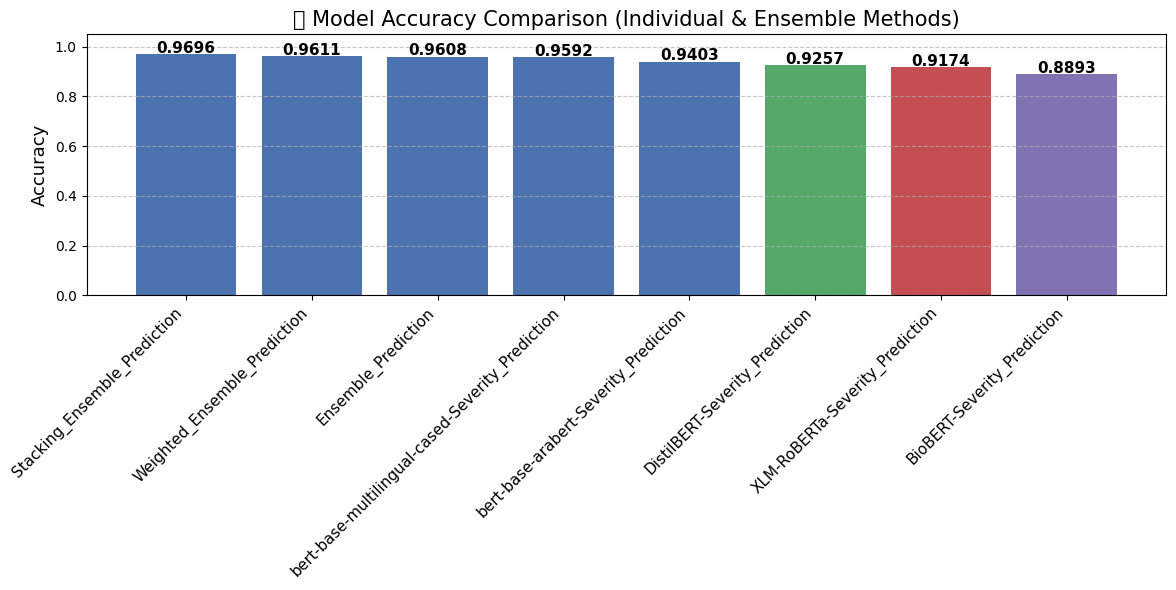

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/working/ensemble_with_stacking_results.csv")

methods = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction",
    "Ensemble_Prediction", 
    "Weighted_Ensemble_Prediction",
    "Stacking_Ensemble_Prediction"
]

accuracies = [(method, (df["True_Severity"] == df[method]).mean()) for method in methods]

accuracies.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*accuracies)

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color=["#4C72B0"] * 5 + ["#55A868", "#C44E52", "#8172B2"])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f"{yval:.4f}", ha='center', fontsize=11, fontweight='bold')

plt.title("🔍 Model Accuracy Comparison (Individual & Ensemble Methods)", fontsize=15)
plt.ylabel("Accuracy", fontsize=13)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("ensemble_accuracy_comparison.png", dpi=300)
plt.show()


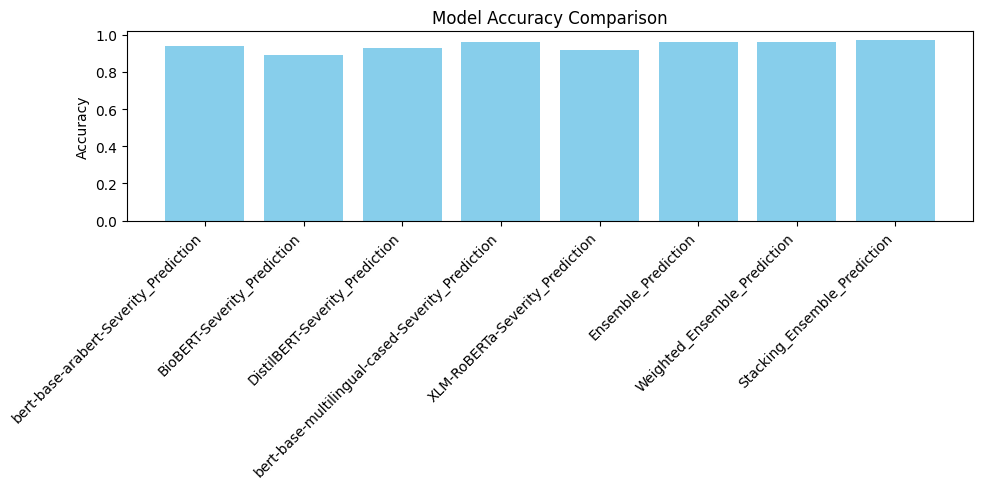

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/working/ensemble_with_stacking_results.csv")

methods = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction",
    "Ensemble_Prediction",  
    "Weighted_Ensemble_Prediction",
    "Stacking_Ensemble_Prediction"
]

accuracies = [ (df["True_Severity"] == df[method]).mean() for method in methods ]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(methods, accuracies, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()


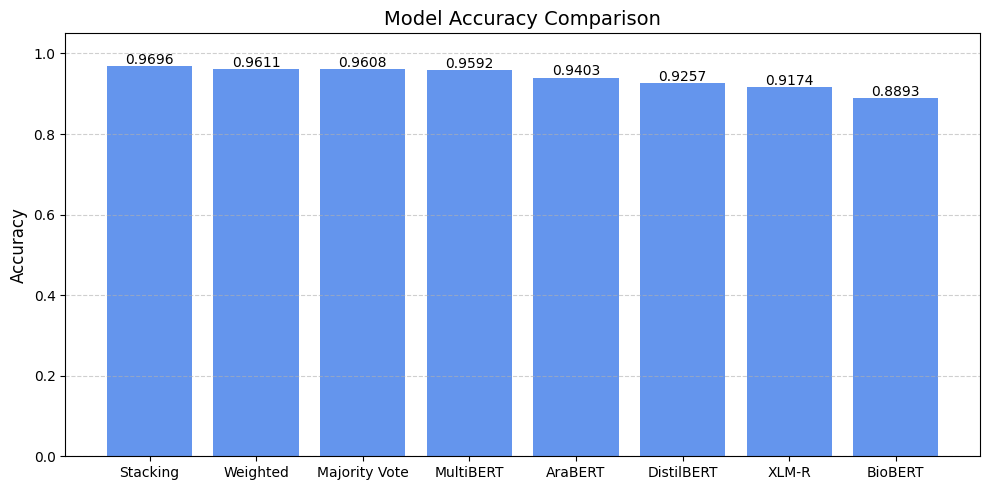

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/working/ensemble_with_stacking_results.csv")

method_map = {
    "bert-base-arabert-Severity_Prediction": "AraBERT",
    "BioBERT-Severity_Prediction": "BioBERT",
    "DistilBERT-Severity_Prediction": "DistilBERT",
    "bert-base-multilingual-cased-Severity_Prediction": "MultiBERT",
    "XLM-RoBERTa-Severity_Prediction": "XLM-R",
    "Ensemble_Prediction": "Majority Vote",
    "Weighted_Ensemble_Prediction": "Weighted",
    "Stacking_Ensemble_Prediction": "Stacking"
}

accuracies = [(label, (df["True_Severity"] == df[full]).mean()) for full, label in method_map.items()]

accuracies.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*accuracies)
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values, color='cornflowerblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{height:.4f}", ha='center', fontsize=10)

plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("short_labels_accuracy_comparison.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib

input_csv_path = "/kaggle/working/weighted_vote_results.csv"
meta_model_path = "/kaggle/working/meta_classifier.pkl"
output_csv_path = "/kaggle/working/ensemble_with_all_results.csv"

df = pd.read_csv(input_csv_path)

model_cols = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction"
]

def majority_vote(row):
    return row[model_cols].mode()[0]

df["Ensemble"] = df.apply(majority_vote, axis=1)
df["Ensemble_Correct"] = df["Ensemble"] == df["True_Severity"]

meta_model = joblib.load(meta_model_path)

all_labels = sorted(df["True_Severity"].unique())
label_to_id = {label: i for i, label in enumerate(all_labels)}
id_to_label = {i: label for label, i in label_to_id.items()}

def extract_stacking_features(row):
    return [label_to_id[row[col]] for col in model_cols]

X_stacking = np.array(df.apply(extract_stacking_features, axis=1).tolist())

stacked_preds = meta_model.predict(X_stacking)
df["Stacking_Ensemble_Prediction"] = [id_to_label[p] for p in stacked_preds]
df["Stacking_Correct"] = df["Stacking_Ensemble_Prediction"] == df["True_Severity"]

df.to_csv(output_csv_path, index=False)
weighted_acc = df["Correct"].mean()
majority_acc = df["Ensemble_Correct"].mean()
stacking_acc = df["Stacking_Correct"].mean()

print(f"✅ Weighted Voting Accuracy: {weighted_acc:.4f}")
print(f"✅ Majority Voting (Ensemble) Accuracy: {majority_acc:.4f}")
print(f"✅ Stacking Ensemble Accuracy: {stacking_acc:.4f}")
print(f"\n📁 Results saved to: {output_csv_path}")

print("\n🔹 Prediction Sample:")
print(df[[
    "True_Severity",
    "Weighted_Ensemble_Prediction",
    "Ensemble",
    "Stacking_Ensemble_Prediction",
    "Correct",
    "Ensemble_Correct",
    "Stacking_Correct"
]].head())


✅ Weighted Voting Accuracy: 0.9611
✅ Majority Voting (Ensemble) Accuracy: 0.9553
✅ Stacking Ensemble Accuracy: 0.9696

📁 Results saved to: /kaggle/working/ensemble_with_all_results.csv

🔹 Prediction Sample:
  True_Severity Weighted_Ensemble_Prediction Ensemble  \
0       غير حرج                      غير حرج  غير حرج   
1       غير حرج                      غير حرج  غير حرج   
2       غير حرج                      غير حرج  غير حرج   
3           حرج                          حرج      حرج   
4       غير حرج                      غير حرج  غير حرج   

  Stacking_Ensemble_Prediction  Correct  Ensemble_Correct  Stacking_Correct  
0                      غير حرج     True              True              True  
1                      غير حرج     True              True              True  
2                          حرج     True              True             False  
3                          حرج     True              True              True  
4                      غير حرج     True              True   

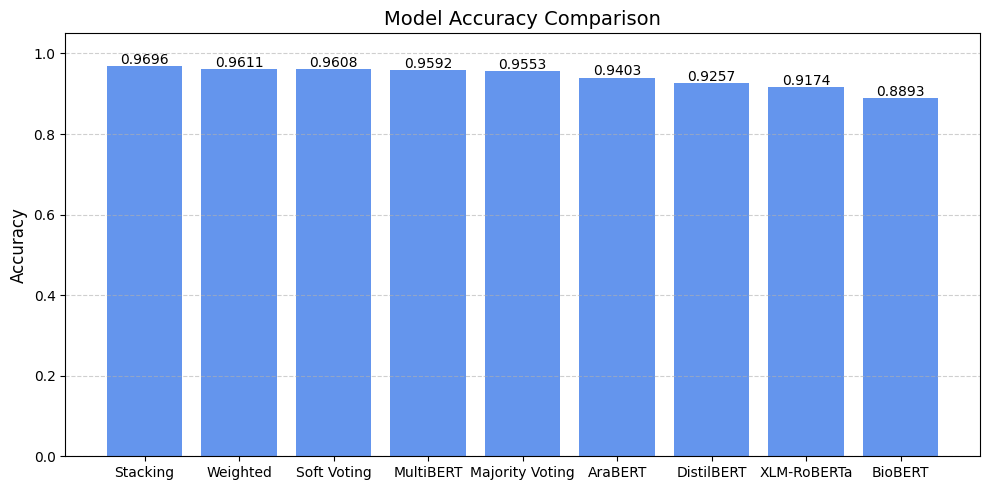

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results
df = pd.read_csv("/kaggle/working/ensemble_with_all_results.csv")

method_map = {
    "bert-base-arabert-Severity_Prediction": "AraBERT",
    "BioBERT-Severity_Prediction": "BioBERT",
    "DistilBERT-Severity_Prediction": "DistilBERT",
    "bert-base-multilingual-cased-Severity_Prediction": "MultiBERT",
    "XLM-RoBERTa-Severity_Prediction": "XLM-RoBERTa",
    "Ensemble_Prediction": "Soft Voting",
    "Ensemble": "Majority Voting",
    "Weighted_Ensemble_Prediction": "Weighted",
    "Stacking_Ensemble_Prediction": "Stacking"
}

accuracies = [(label, (df["True_Severity"] == df[full]).mean()) for full, label in method_map.items()]

accuracies.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*accuracies)
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values, color='cornflowerblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{height:.4f}", ha='center', fontsize=10)

plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("short_labels_accuracy_comparison.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import joblib

input_csv_path = "/kaggle/working/weighted_vote_results.csv"
meta_model_path = "/kaggle/working/meta_classifier.pkl"
output_csv_path = "/kaggle/working/ensemble_with_all_results.csv"

df = pd.read_csv(input_csv_path)

model_cols = [
    "bert-base-arabert-Severity_Prediction",
    "BioBERT-Severity_Prediction",
    "DistilBERT-Severity_Prediction",
    "bert-base-multilingual-cased-Severity_Prediction",
    "XLM-RoBERTa-Severity_Prediction"
]

def majority_vote(row):
    return row[model_cols].mode()[0]

df["Ensemble"] = df.apply(majority_vote, axis=1)
df["Ensemble_Correct"] = df["Ensemble"] == df["True_Severity"]

df["Weighted_Correct"] = df["Weighted_Ensemble_Prediction"] == df["True_Severity"]

meta_model = joblib.load(meta_model_path)

all_labels = sorted(df["True_Severity"].unique())
label_to_id = {label: i for i, label in enumerate(all_labels)}
id_to_label = {i: label for label, i in label_to_id.items()}

def extract_stacking_features(row):
    return [label_to_id[row[col]] for col in model_cols]

X_stacking = np.array(df.apply(extract_stacking_features, axis=1).tolist())

stacked_preds = meta_model.predict(X_stacking)
df["Stacking_Ensemble_Prediction"] = [id_to_label[p] for p in stacked_preds]
df["Stacking_Correct"] = df["Stacking_Ensemble_Prediction"] == df["True_Severity"]

df.to_csv(output_csv_path, index=False)

weighted_acc = df["Weighted_Correct"].mean()
majority_acc = df["Ensemble_Correct"].mean()
stacking_acc = df["Stacking_Correct"].mean()

print(f"✅ Weighted Voting Accuracy: {weighted_acc:.4f}")
print(f"✅ Majority Voting (Ensemble) Accuracy: {majority_acc:.4f}")
print(f"✅ Stacking Ensemble Accuracy: {stacking_acc:.4f}")
print(f"\n📁 Results saved to: {output_csv_path}")

print("\n🔹 Prediction Sample:")
print(df[[
    "True_Severity",
    "Weighted_Ensemble_Prediction",
    "Ensemble",
    "Stacking_Ensemble_Prediction",
    "Weighted_Correct",
    "Ensemble_Correct",
    "Stacking_Correct"
]].head())


✅ Weighted Voting Accuracy: 0.9611
✅ Majority Voting (Ensemble) Accuracy: 0.9553
✅ Stacking Ensemble Accuracy: 0.9696

📁 Results saved to: /kaggle/working/ensemble_with_all_results.csv

🔹 Prediction Sample:
  True_Severity Weighted_Ensemble_Prediction Ensemble  \
0       غير حرج                      غير حرج  غير حرج   
1       غير حرج                      غير حرج  غير حرج   
2       غير حرج                      غير حرج  غير حرج   
3           حرج                          حرج      حرج   
4       غير حرج                      غير حرج  غير حرج   

  Stacking_Ensemble_Prediction  Weighted_Correct  Ensemble_Correct  \
0                      غير حرج              True              True   
1                      غير حرج              True              True   
2                          حرج              True              True   
3                          حرج              True              True   
4                      غير حرج              True              True   

   Stacking_Correct  
0      

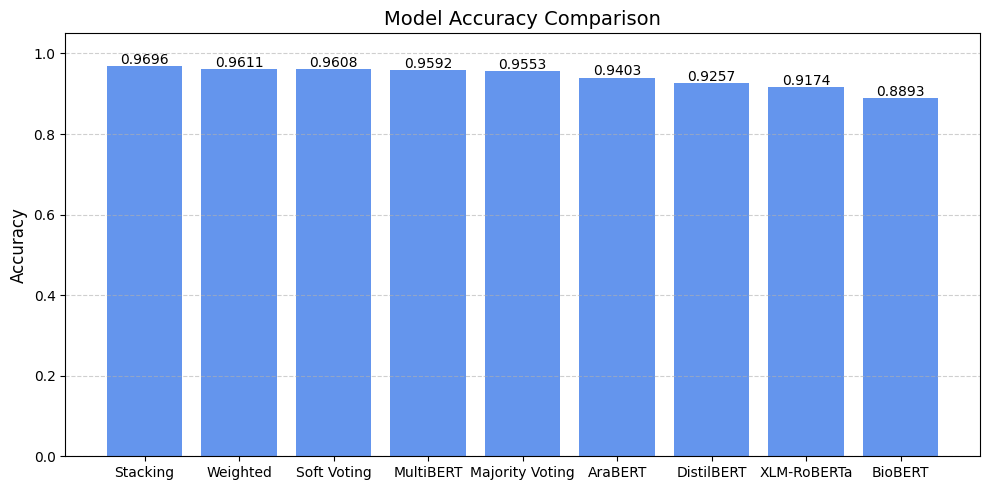

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/newwdata/ensemble_with_all_results (1).csv")

method_map = {
    "bert-base-arabert-Severity_Prediction": "AraBERT",
    "BioBERT-Severity_Prediction": "BioBERT",
    "DistilBERT-Severity_Prediction": "DistilBERT",
    "bert-base-multilingual-cased-Severity_Prediction": "MultiBERT",
    "XLM-RoBERTa-Severity_Prediction": "XLM-RoBERTa",
    "Soft_Voting": "Soft Voting",
    "Majority_Voting": "Majority Voting",
    "Weighted_Voting": "Weighted",
    "Stacking_Ensemble_Prediction": "Stacking"
}

accuracies = [(label, (df["True_Severity"] == df[full]).mean()) for full, label in method_map.items()]

accuracies.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*accuracies)
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values, color='cornflowerblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{height:.4f}", ha='center', fontsize=10)

plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("short_labels_accuracy_comparison.png", dpi=300)
plt.show()
